**Análise Estatística de Planos Pré-Pagos:**  
**cliente**: **Megaline**  
  
Neste projeto, conduzido como parte do Sprint 4 do curso de Análise de Dados, realizei uma investigação estatística para a empresa de telecomunicações **Megaline**. A empresa oferece dois planos pré-pagos — **Surf** e **Ultimate** — e deseja identificar qual deles gera maior receita média por cliente, a fim de otimizar seus investimentos em publicidade.  
  
**Objetivo da Análise**:  
O objetivo central deste estudo é **analisar o comportamento dos usuários de cada plano** com base em dados de chamadas, mensagens e uso de internet, e **comparar estatisticamente a receita média mensal entre os planos**.  
Também será testada uma hipótese sobre variações de receita entre regiões.  
  
**Dados**:
A análise foi realizada com base em cinco conjuntos de dados:  
- **Usuários (users)**: Informações de cadastro e plano escolhido.  
- **Chamadas (calls)**: Duração e frequência das chamadas.  
- **Mensagens (messages)**: Quantidade de SMS enviados.  
- **Internet (internet)**: Uso de dados em megabytes.  
- **Planos (plans)**: Detalhamento dos pacotes e preços.  
  
**Etapas Realizadas**:  
- **Importação e limpeza de dados**: Conversão de tipos, tratamento de valores ausentes e inconsistências.  
- **Engenharia de recursos**: Cálculo de consumo mensal e receita por cliente.  
- **Análise exploratória**: Visualizações, estatísticas descritivas e compreensão dos padrões de uso.  
- **Testes de hipótese**: Verificação estatística de diferenças nas receitas médias entre planos e regiões.  
  
Ao final, são apresentadas conclusões que ajudarão a Megaline a direcionar melhor suas ações de marketing com base em dados reais.  
  
**Contato**:  
**Autor:** Daniel Amorim  
**Análise de Dados | Marketing e Publicidade**  
**Especialista em Branding**  
🔗 [Linkedin: www.linkedin.com/in/danieloamorim](https://www.linkedin.com/in/danieloamorim)  

---

**Qual é o melhor plano?**  

A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate.  
O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.  
  
Será realizada uma análise preliminar dos planos com base em uma pequena seleção de clientes.  
Serão fornecidos dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018.  
Analise o comportamento dos clientes e determine qual plano pré-pago gera mais receita.  

## Inicialização:

In [695]:
# Carregando todas as bibliotecas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
import math
import calendar
from scipy.stats import mannwhitneyu

## Carregue os dados:

In [696]:
# Carregue os arquivos de dados em diferentes DataFrames
calls_df = pd.read_csv('C:/Users/Daniel/Desktop/Uploads_GitHub/Megaline/megaline_calls.csv')
internet_df = pd.read_csv('C:/Users/Daniel/Desktop/Uploads_GitHub/Megaline/megaline_internet.csv')
messages_df = pd.read_csv('C:/Users/Daniel/Desktop/Uploads_GitHub/Megaline/megaline_messages.csv')
plans_df = pd.read_csv('C:/Users/Daniel/Desktop/Uploads_GitHub/Megaline/megaline_plans.csv')
users_df = pd.read_csv('C:/Users/Daniel/Desktop/Uploads_GitHub/Megaline/megaline_users.csv')

<div class="alert alert-block alert-success">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Os dados foram carregados corretamente.
</div>

## Prepare os dados:

Os dados deste projeto estão divididos em várias tabelas.  
Explore cada uma para obter uma compreensão inicial dos dados.  
Faça correções em cada tabela, se necessário.  

### Planos:

In [697]:
# Informações gerais/resumo sobre o DataFrame dos planos:
print("\nInformções gerais do DataFrame plans_df\n")
print(plans_df.info())



Informções gerais do DataFrame plans_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes
None


In [698]:
# Imprimir amostra de dados dos planos:
print("\nResumo estatístico do DataFrame plans:\n")
print(plans_df.describe())
print()
print("\nInformações gerais do DataFrame plans:\n")
print(plans_df.head(5))


Resumo estatístico do DataFrame plans:

       messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   
std           671.751442           10861.160159       1767.766953   
min            50.000000           15360.000000        500.000000   
25%           287.500000           19200.000000       1125.000000   
50%           525.000000           23040.000000       1750.000000   
75%           762.500000           26880.000000       2375.000000   
max          1000.000000           30720.000000       3000.000000   

       usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute  
count         2.000000     2.00000         2.000000        2.000000  
mean         45.000000     8.50000         0.020000        0.020000  
std          35.355339     2.12132         0.014142        0.014142  
min          20.000000     7.00000         0.010000      

Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima.   
Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?  

O DataFrame plans_df não apresenta dados ausentes, pois todas as 8 colunas possuem valores não nulos. No entanto como só há duas colunas referentes aos planos Surf e Ultimate, a análise estatistica acaba por ser limitada e não representa com exatidão a variabilidade dos planos.
Os valores das colunas "usd_per_gb usd_per_message" e "usd_per_minute" variam de forma significativa, o que pode ser proposital ou alguma inconsistencia.
A unica coluna categórica é a "plan_name", o que pode limitar algumas análises comparativas.

**Corrija problemas óbvios com os dados conforme as observações iniciais**:

In [699]:
# Confirmar valores ausentes:
print("\nValores Ausentes de plans_df:\n")
print(plans_df.isnull().sum())
print()

# Resumo estatístico inicial:
print("\nResumo estatístico de plans_df:\n")
print(plans_df.describe())
print()

# Selecionar apenas colunas numéricas:
numeric_cols = plans_df.select_dtypes(include='number').columns

# Remover outliers com base no Intervalo Interquartil (IQR):
Q1 = plans_df[numeric_cols].quantile(0.25)
Q3 = plans_df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Máscara para valores dentro do intervalo:
mask = ~((plans_df[numeric_cols] < (Q1 - 1.5 * IQR)) | (plans_df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Aplicar máscara ao DataFrame completo:
plans_df = plans_df[mask]

# Resumo estatístico após remoção de outliers:
print("\nResumo estatístico de plans_df (sem outliers):\n")
print(plans_df.describe())
print()

# Padronizar unidades de medida (MB para GB):
if "mb_per_month_included" in plans_df.columns:
    plans_df["gb_per_month_included"] = plans_df["mb_per_month_included"] / 1024
    plans_df.drop(columns=["mb_per_month_included"], inplace=True)

# Informações gerais:
print("\nInformações de plans_df:\n")
print(plans_df.info())
print()

# Amostra dos dados:
print("\nAmostra de dados estatísticos de plans_df:\n")
print(plans_df.head(5))



Valores Ausentes de plans_df:

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64


Resumo estatístico de plans_df:

       messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   
std           671.751442           10861.160159       1767.766953   
min            50.000000           15360.000000        500.000000   
25%           287.500000           19200.000000       1125.000000   
50%           525.000000           23040.000000       1750.000000   
75%           762.500000           26880.000000       2375.000000   
max          1000.000000           30720.000000       3000.000000   

       usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute  
count       

**Enriqueça os dados**:

Inclua fatores adicionais aos dados que possam ser úteis:

C:\Users\Daniel\AppData\Local\Temp\ipykernel_3220\1670470645.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=plans_df, x="plan_name", palette="viridis")


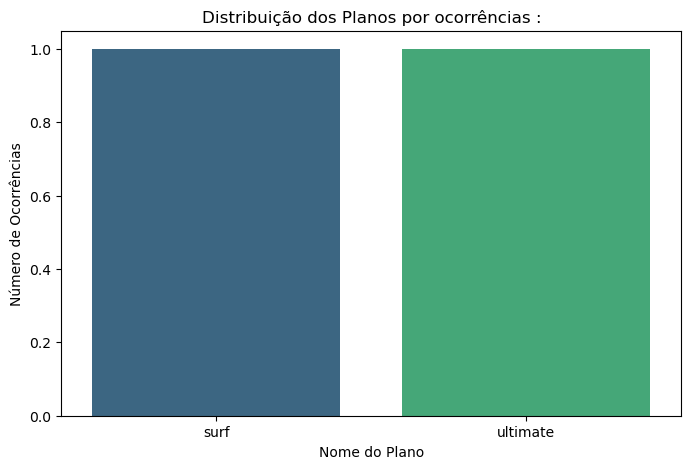

In [700]:
#Verificar popularidade dos planos a partir de ocorrencias:
plt.figure(figsize=(8,5))
sns.countplot(data=plans_df, x="plan_name", palette="viridis")
plt.title("Distribuição dos Planos por ocorrências :")
plt.xlabel("Nome do Plano")
plt.ylabel("Número de Ocorrências")
plt.show()
print()

### Usuários:

In [701]:
# Imprima informações gerais/resumo sobre o DataFrame dos usuários
print("\nInformações gerais/resumo de users_df:")
print()
users_df.info()



Informações gerais/resumo de users_df:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [702]:
print("Amostra dos dados dos usuários :")
print(users_df.head())
print()
print("Estatísticas descritivas usuários:")
print(users_df.describe())


Amostra dos dados dos usuários :
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  

Estatísticas descritivas usuários:
           user_id         age
count   500.000000  500.000000
mean   1249.500000   45.486000
std     144.481833   16.972269
min    1000.000000   18.000000
25%    1124.750000   30.000000
50%    1249.500000   46.000000
75%    1374

Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?

**user_id**: O identificador do usuário parece ser um número inteiro, o que está adequado para um identificador exclusivo.  
**first_name** e **last_name**: Estão no formato de texto (str), que é o esperado.  
**age**: A idade está em formato inteiro, o que é adequado.  
**city**: A cidade é uma string, mas parece que alguns valores incluem múltiplas localidades ou MSA (Metropolitan Statistical Area). Isso pode precisar de padronização ou separação se for necessário trabalhar com dados de cidade de forma mais específica.  
**reg_date**: A data de inscrição está em formato de string (dd-mm-aa). Ela precisaria ser convertida para um tipo de dado datetime para análise temporal.
**plan**: O plano também é uma string, o que está adequado.  
**churn_date**: Embora tenha valores ausentes (NaN), está no formato correto, que pode ser convertido para datetime também para análise.

**Corrija os dados**:  
Faça a correção de problemas óbvios com os dados conforme as observações iniciais.

In [703]:
# Conversão de `reg_date` e `churn_date` para datetime:
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format='%Y-%m-%d')
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], errors='coerce')

# Para usuários ainda ativos, podemos substituir NaT (Not a Time) por uma data como a data atual:
users_df['churn_date'].fillna(pd.to_datetime('today'), inplace=True)

# Normalizar a coluna `city` para manter apenas a cidade principal (excluindo "MSA" e outros elementos):
users_df['city'] = users_df['city'].str.split(',').str[0]

# Exibir o DataFrame corrigido:
users_df.head()

C:\Users\Daniel\AppData\Local\Temp\ipykernel_3220\1241870064.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  users_df['churn_date'].fillna(pd.to_datetime('today'), inplace=True)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,2025-06-28 20:35:30.036005
1,1001,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,2025-06-28 20:35:30.036005
2,1002,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,2025-06-28 20:35:30.036005
3,1003,Reynaldo,Jenkins,52,Tulsa,2018-01-28,surf,2025-06-28 20:35:30.036005
4,1004,Leonila,Thompson,40,Seattle-Tacoma-Bellevue,2018-05-23,surf,2025-06-28 20:35:30.036005


**Enriqueça os dados**:  
Inclua fatores adicionais que podem ser úteis:  

In [704]:
# Correção da coluna 'churn_date' para tratar valores ausentes:
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], errors='coerce')

# Verificar as primeiras linhas dos DataFrames corrigidos:
print("Tabela de Usuários:")
print(users_df.head())
print()
print("\nTabela de Chamadas:")
print(calls_df.head())
print()
print("\nTabela de Mensagens:")
print(messages_df.head())
print()
print("\nTabela de Internet:")
print(internet_df.head())
print()
print("\nTabela de Planos:")
print(plans_df.head())
print()

# Merge entre 'users_df' e 'plans_df' para adicionar as informações de preços mensais do plano:
users_df = users_df.merge(plans_df[['plan_name', 'usd_monthly_pay']], how='left', left_on='plan', right_on='plan_name')

# Exibir o DataFrame de usuários com as informações do plano:
print("\nUsuários com informações do plano:")
print(users_df.head())

Tabela de Usuários:
   user_id first_name  last_name  age                           city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise   
3     1003   Reynaldo    Jenkins   52                          Tulsa   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue   

    reg_date      plan                 churn_date  
0 2018-12-24  ultimate 2025-06-28 20:35:30.036005  
1 2018-08-13      surf 2025-06-28 20:35:30.036005  
2 2018-10-21      surf 2025-06-28 20:35:30.036005  
3 2018-01-28      surf 2025-06-28 20:35:30.036005  
4 2018-05-23      surf 2025-06-28 20:35:30.036005  


Tabela de Chamadas:
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.7

### Chamadas:  

In [705]:
# Exibir informações gerais sobre o DataFrame das chamadas:
print("Informações gerais sobre o DataFrame das Chamadas:")
print(calls_df.info())

Informações gerais sobre o DataFrame das Chamadas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [706]:
# Amostra de dados das chamadas:
print("Estatísticas descritivas das Chamadas:")
print(calls_df.describe())
print()
print("Amostra dos dados das Chamadas:")
print()
print(calls_df.head())


Estatísticas descritivas das Chamadas:
             user_id       duration
count  137735.000000  137735.000000
mean     1247.658046       6.745927
std       139.416268       5.839241
min      1000.000000       0.000000
25%      1128.000000       1.290000
50%      1247.000000       5.980000
75%      1365.000000      10.690000
max      1499.000000      37.600000

Amostra dos dados das Chamadas:

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima:  
Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?  
  
- O DataFrame das **Chamadas** contém 5 entradas com 4 colunas, sendo que a coluna  **call_date** contém tipos inadequados, o que pode dificultar a manipulação dos dados.  
- A coluna **call_date** precisou ser convertida para o tipo datetime para facilitar a análise temporal.  
  
Embora não existam dados ausentes, seria interessante verificar a presença de valores discrepantes nas durações das chamadas (que variam de 10 a 30 minutos), além de otimizar os tipos de dados caso o conjunto de dados aumente.  
Essas correções melhorariam a integridade e a eficiência do DataFrame para análises futuras.

**Corrija os dados**:  
Corrija problemas óbvios com os dados conforme as observações iniciais:

In [707]:
# Converter coluna 'call_date' para o tipo datetime:
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format='%Y-%m-%d')
# Verificar os tipos de dados depois da conversão:
calls_df.dtypes

id                   object
user_id               int64
call_date    datetime64[ns]
duration            float64
dtype: object

**Enriqueça os dados**:  
Acrescente fatores adicionais que possam ser úteis:

In [708]:
# Função simples para classificar a duração da chamada:
def classificar_chamada(duracao):
    if duracao < 5:
        return 'curta'
    else:
        return 'longa'

# Aplicar a coluna 'duration' e criar uma nova coluna 'call_type':
calls_df['call_type'] = calls_df['duration'].apply(classificar_chamada)

# Criar coluna com o mês da chamada (para análises mensais):
calls_df['month'] = calls_df['call_date'].dt.to_period('M')

# Criar coluna com o dia da semana (0 = segunda, 6 = domingo):
calls_df['weekday'] = calls_df['call_date'].dt.dayofweek

# Criar coluna booleana indicando se a chamada foi no fim de semana:
calls_df['is_weekend'] = calls_df['weekday'].isin([5, 6])

# Confirmar resultados:
print("Amostra de chamadas com novas colunas:")
print(calls_df[['duration', 'call_type', 'call_date', 'month', 'weekday', 'is_weekend']].head())
print()
# Contagem de chamadas curtas e longas:
print("\nContagem de chamadas por tipo:")
print(calls_df['call_type'].value_counts())
print()
# Distribuição de chamadas por dia da semana:
print("\nDistribuição de chamadas por dia da semana (0=Segunda, 6=Domingo):")
print(calls_df['weekday'].value_counts().sort_index())
print()
# Total de chamadas feitas em fins de semana:
print("\nTotal de chamadas feitas no fim de semana:")
print(calls_df['is_weekend'].sum())

Amostra de chamadas com novas colunas:
   duration call_type  call_date    month  weekday  is_weekend
0      8.52     longa 2018-12-27  2018-12        3       False
1     13.66     longa 2018-12-27  2018-12        3       False
2     14.48     longa 2018-12-27  2018-12        3       False
3      5.76     longa 2018-12-28  2018-12        4       False
4      4.22     curta 2018-12-30  2018-12        6        True


Contagem de chamadas por tipo:
call_type
longa    76586
curta    61149
Name: count, dtype: int64


Distribuição de chamadas por dia da semana (0=Segunda, 6=Domingo):
weekday
0    20329
1    19245
2    19139
3    19471
4    19541
5    19828
6    20182
Name: count, dtype: int64


Total de chamadas feitas no fim de semana:
40010


### Mensagens:

In [709]:
# Imprima informações gerais/resumo sobre o DataFrame das mensagens:
print(messages_df.head())

# Informações gerais:
print(messages_df.info())
print()

# Se há valores ausentes:
print("Há valores ausentes?:")
print(messages_df.isnull().sum())


         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None

Há valores ausentes?:
id              0
user_id         0
message_date    0
dtype: int64


In [710]:
# Amostra dos dados das mensagens:
print("Estatísticas descritivas de messages_df:")
print()
print(messages_df.describe())


Estatísticas descritivas de messages_df:

            user_id
count  76051.000000
mean    1245.972768
std      139.843635
min     1000.000000
25%     1123.000000
50%     1251.000000
75%     1362.000000
max     1497.000000


Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima.  
Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?  
  
Os dados parecem bem estruturados, sem valores ausentes e com os tipos corretos para cada coluna.    
A coluna **month** pode ter sido calculada incorretamente, já que o mês 4 não apareceu na amostra. Isso pode indicar falha na extração ou simplesmente a ausência de registros para abril.  
Além disso, como a amostra contém apenas cinco registros, pode não ser suficiente para identificar padrões ou inconsistências mais abrangentes.  
Para garantir que a coluna **month** esteja correta, o ideal seria recalculá-la a partir da data da mensagem.  

**Corrija os dados**:  
Corrija problemas óbvios com os dados conforme as observações iniciais.

In [711]:
# Converter a coluna 'message_date' para datetime:
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'])
#remover linhas aonde a data esteja ausente:
messages_df = messages_df.dropna(subset=['message_date'])
# Corrigir a coluna 'month' com base na 'message_date':
messages_df['month'] = messages_df['message_date'].dt.month.astype(int)

# Exibir o dataframe corrigido
print(messages_df)

             id  user_id message_date  month
0      1000_125     1000   2018-12-27     12
1      1000_160     1000   2018-12-31     12
2      1000_223     1000   2018-12-31     12
3      1000_251     1000   2018-12-27     12
4      1000_255     1000   2018-12-26     12
...         ...      ...          ...    ...
76046  1497_526     1497   2018-12-24     12
76047  1497_536     1497   2018-12-24     12
76048  1497_547     1497   2018-12-31     12
76049  1497_558     1497   2018-12-24     12
76050  1497_613     1497   2018-12-23     12

[76051 rows x 4 columns]


**Enriqueça os dados**:  
Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.

In [712]:
# Criar coluna com o dia da semana (0 = segunda, 6 = domingo)
messages_df['weekday'] = messages_df['message_date'].dt.dayofweek

# Criar coluna booleana indicando se a mensagem foi enviada no fim de semana
messages_df['is_weekend'] = messages_df['weekday'].isin([5, 6])

# Criar coluna com a semana do ano (útil para agrupamentos semanais)
messages_df['week_of_year'] = messages_df['message_date'].dt.isocalendar().week

# Criar coluna com o ano (caso haja mais de um ano no dataset)
messages_df['year'] = messages_df['message_date'].dt.year
print(messages_df[['message_date', 'month', 'weekday', 'is_weekend', 'week_of_year', 'year']].head())

  message_date  month  weekday  is_weekend  week_of_year  year
0   2018-12-27     12        3       False            52  2018
1   2018-12-31     12        0       False             1  2018
2   2018-12-31     12        0       False             1  2018
3   2018-12-27     12        3       False            52  2018
4   2018-12-26     12        2       False            52  2018


### Internet:

In [713]:
# Imprima informações gerais/resumo sobre o DataFrame da internet:
print(internet_df.head())
print()
#verificar se há valores ausentes ou nulos:
print("Há valores ausentes?:")
print(internet_df.isnull().sum())
#Informações:
print(internet_df.info())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22

Há valores ausentes?:
id              0
user_id         0
session_date    0
mb_used         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [714]:
# Estatísticas descritivas das colunas numéricas:
print(internet_df.describe())


             user_id        mb_used
count  104825.000000  104825.000000
mean     1242.496361     366.713701
std       142.053913     277.170542
min      1000.000000       0.000000
25%      1122.000000     136.080000
50%      1236.000000     343.980000
75%      1367.000000     554.610000
max      1499.000000    1693.470000


Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima.  
Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?  
  
Os dados fornecidos consistem em informações sobre o uso de dados por usuários, com registros contendo o identificador de cada sessão (id), o identificador do usuário (user_id), a data da sessão (session_date) e a quantidade de megabytes utilizados na sessão (mb_used). A amostra exibida apresenta algumas variações no uso de dados, com **valores que vão de 0 a 1693.47 MB**.  
É possível notar que o campo **session_date** está em formato texto e deve ser convertido para o tipo datetime, enquanto o **user_id** pode ser tratado como string, caso represente um identificador único, sem a necessidade de cálculos numéricos.  
Não há valores ausentes aparentes, mas foi necessária a verificação de valores NaN.  
  
- O valor **mínimo** de **mb_used** sendo 0 MB pode indicar sessões sem uso de dados, o que pode ser normal ou refletir erros no registro dos dados.    
- O valor **máximo** de 1693.47 MB parece alto, mas não é necessariamente inválido.  
- Para investigar possíveis anomalias, pode-se aplicar o método **IQR (intervalo interquartil)** para identificar os outliers.  
- Importante verificar se há registros de usuários com sessões de 0 MB e se precisam de algum ajuste.  

**Corrija os dados**:  
Corrija problemas óbvios com os dados conforme as observações iniciais.

In [715]:
# Verificar tipos de dados e primeiras linhas
print(internet_df.info())
print()
print(internet_df.head())

# Converter a coluna 'session_date' para o tipo datetime (importante para análises por tempo)
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])

# Verificar novamente após a conversão
print(internet_df.dtypes)

# Converter 'user_id' para string, pois é apenas um identificador e não será usado em cálculos
internet_df['user_id'] = internet_df['user_id'].astype(str)

# Verificar possíveis valores fora do padrão (outliers) em 'mb_used'
Q1 = internet_df['mb_used'].quantile(0.25)
Q3 = internet_df['mb_used'].quantile(0.75)
IQR = Q3 - Q1

# Limites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Verificar registros considerados outliers
outliers = internet_df[(internet_df['mb_used'] < limite_inferior) | (internet_df['mb_used'] > limite_superior)]
print(f"\nQuantidade de outliers encontrados: {outliers.shape[0]}")
print(outliers[['user_id', 'mb_used']].head())

# Criar nova versão da base de dados sem os outliers
internet_df_cleaned = internet_df[~internet_df.index.isin(outliers.index)].copy()

# Verificar sessões com uso de dados igual a 0 MB
usuarios_com_zero = internet_df_cleaned[internet_df_cleaned['mb_used'] == 0]['user_id'].nunique()
print(f"\nUsuários com pelo menos uma sessão de 0 MB: {usuarios_com_zero}")

# Visualizar os dados ajustados
print("\nPrimeiras linhas dos dados limpos:")
print(internet_df_cleaned.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
id                      object
user_id                  int64
session_date    datetime64[ns]
mb_used                float64
dtype: object

Quantidade de outliers encontrados: 424
     user_id  mb_used
400     1003  1222.45
414     1003  1220.86
950     1006  1301.96
972     1006  1257.78
1172    100

- Foi realizada a conversão de **session_date** para **datetime**, o que é essencial para trabalhar com datas.  
- Ajuste de **user_id** para string, pois ele é apenas um identificador.  
- Foram identificados e removidos outliers com o método do IQR.  
- Contagem de quantos usuários tiveram sessões com 0 MB, pode ser relevante em análises futuras.  
- Foi criado um novo DataFrame com os dados limpos **internet_df_cleaned**.

**Enriqueça os dados**:  
Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.

In [716]:
# Criar coluna com o nome do dia da semana (ex: Segunda, Terça)
internet_df_cleaned['weekday'] = internet_df_cleaned['session_date'].dt.day_name()

# Criar coluna indicando se a sessão foi feita no fim de semana
internet_df_cleaned['is_weekend'] = internet_df_cleaned['weekday'].isin(['Saturday', 'Sunday'])

# Verificar
print(internet_df_cleaned[['session_date', 'weekday', 'is_weekend']].head())


  session_date    weekday  is_weekend
0   2018-12-29   Saturday        True
1   2018-12-31     Monday       False
2   2018-12-28     Friday       False
3   2018-12-26  Wednesday       False
4   2018-12-27   Thursday       False


### Estudo sobre as condições dos planos:

É fundamental entender como os planos funcionam, ou seja, como as cobranças dos usuários são feitas com base na assinatura.  
Imprima as informações sobre os planos para visualizar novamente as condições.  

In [717]:
# Imprima as condições dos planos e certifique-se de que elas fazem sentido para você:
for index, row in plans_df.iterrows():
    print(f"Plano: {row['plan_name']}")
    print(f" Valor mensal: ${row['usd_monthly_pay']:.2f}")
    print(f" Minutos incluidos: {row['minutes_included']} minutos")
    print(f" Mensagens incluidas: {row['messages_included']} mensagens")
    print(f" Dados incluidos: {row['gb_per_month_included']} GB")
    print(f" Custo por minuto excedente: ${row['usd_per_minute']:.2f} por minuto")
    print(f" Custo por mensagem excedente: ${row['usd_per_message']:.2f} por mensagem")
    print(f" Custo por GB excedente: ${row['usd_per_gb']:.2f} por GB")
    print("-" * 20)

Plano: surf
 Valor mensal: $20.00
 Minutos incluidos: 500 minutos
 Mensagens incluidas: 50 mensagens
 Dados incluidos: 15.0 GB
 Custo por minuto excedente: $0.03 por minuto
 Custo por mensagem excedente: $0.03 por mensagem
 Custo por GB excedente: $10.00 por GB
--------------------
Plano: ultimate
 Valor mensal: $70.00
 Minutos incluidos: 3000 minutos
 Mensagens incluidas: 1000 mensagens
 Dados incluidos: 30.0 GB
 Custo por minuto excedente: $0.01 por minuto
 Custo por mensagem excedente: $0.01 por mensagem
 Custo por GB excedente: $7.00 por GB
--------------------


### Agregue os dados por usuário:  
Como os dados limpos, agregue por usuário e por período para ter apenas um registro dessas informações.  
Calcule o número de chamadas feitas por cada usuário por mês, e salve o resultado.  

In [718]:
# Certificando que a coluna call date esta em date-time:
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])

# Criar coluna 'month' com base na data:
calls_df['month'] = calls_df['call_date'].dt.to_period('M')
calls_per_user_per_month = calls_df.groupby(['user_id', 'month']).size().reset_index(name='num_calls')

print(calls_per_user_per_month)

      user_id    month  num_calls
0        1000  2018-12         16
1        1001  2018-08         27
2        1001  2018-09         49
3        1001  2018-10         65
4        1001  2018-11         64
...       ...      ...        ...
2253     1498  2018-12         39
2254     1499  2018-09         41
2255     1499  2018-10         53
2256     1499  2018-11         45
2257     1499  2018-12         65

[2258 rows x 3 columns]


Calcule a quantidade de minutos gastos por cada usuário por mês, e salve o resultado.  

In [719]:
# Adicionar coluna de mês na tabela de chamadas:
calls_df['month'] = calls_df['call_date'].dt.month

# Calcular o total de minutos por usuário por mês:
minutes_per_user_per_month = calls_df.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='total_minutes_spent_per_month')

# Exibir o resultado:
print(minutes_per_user_per_month)

      user_id  month  total_minutes_spent_per_month
0        1000     12                         116.83
1        1001      8                         171.14
2        1001      9                         297.69
3        1001     10                         374.11
4        1001     11                         404.59
...       ...    ...                            ...
2253     1498     12                         324.77
2254     1499      9                         330.37
2255     1499     10                         363.28
2256     1499     11                         288.56
2257     1499     12                         468.10

[2258 rows x 3 columns]


Calcule o número de mensagens enviadas por cada usuário por mês, e salve o resultado.

In [720]:
# Adicionar coluna mês à tabela de mensagens:
messages_df['month'] = messages_df['message_date'].dt.month

# Calcular o total de mensagens enviadas por usuário por mês
messages_per_user_per_month = messages_df.groupby(['user_id', 'month']).size().reset_index(name='total_messages_sent_per_month')

# Exibir o resultado
print(messages_per_user_per_month)


      user_id  month  total_messages_sent_per_month
0        1000     12                             11
1        1001      8                             30
2        1001      9                             44
3        1001     10                             53
4        1001     11                             36
...       ...    ...                            ...
1801     1496      9                             21
1802     1496     10                             18
1803     1496     11                             13
1804     1496     12                             11
1805     1497     12                             50

[1806 rows x 3 columns]


Calcule o volume de tráfego de internet usado por cada usuário por mês, e salve o resultado:

In [721]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.
internet_df_cleaned['session_date'] = pd.to_datetime(internet_df_cleaned['session_date'])
# Adicionar coluna mês à tabela internet:
internet_df_cleaned['month'] = internet_df_cleaned['session_date'].dt.month
# Calcular o volume total de tráfego de internet usado por usuário por mês
internet_traffic_per_user_per_month = internet_df_cleaned.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name='total_traffic_used_mb')
# Exibir o resultado
print(internet_traffic_per_user_per_month)


     user_id  month  total_traffic_used_mb
0       1000     12                1901.47
1       1001      8                6919.15
2       1001      9               13314.82
3       1001     10               22330.49
4       1001     11               18504.30
...      ...    ...                    ...
2272    1498     12               23137.69
2273    1499      9               12984.76
2274    1499     10               19492.43
2275    1499     11               15580.97
2276    1499     12               20614.24

[2277 rows x 3 columns]


Coloque os dados agregados em um DataFrame para que cada registro nele represente o que cada usuário consumiu em um determinado mês:

In [722]:
# Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month
# Garantir consistência dos tipos
calls_df['user_id'] = calls_df['user_id'].astype(int)
messages_df['user_id'] = messages_df['user_id'].astype(int)
internet_df['user_id'] = internet_df['user_id'].astype(int)

# Criar coluna 'month' com base nas datas
calls_df['month'] = pd.to_datetime(calls_df['call_date']).dt.to_period('M')
messages_df['month'] = pd.to_datetime(messages_df['message_date']).dt.to_period('M')
internet_df['month'] = pd.to_datetime(internet_df['session_date']).dt.to_period('M')

# Agregar por user_id e month
calls_per_user_per_month = calls_df.groupby(['user_id', 'month']).agg(
    total_calls=('id', 'count'),
    total_duration=('duration', 'sum')
).reset_index()

messages_per_user_per_month = messages_df.groupby(['user_id', 'month']).agg(
    total_messages_sent=('id', 'count')
).reset_index()

internet_per_user_per_month = internet_df.groupby(['user_id', 'month']).agg(
    total_traffic_used_mb=('mb_used', 'sum')
).reset_index()

# Juntar os dados agregados
monthly_user_consumption = calls_per_user_per_month.merge(
    messages_per_user_per_month,
    on=['user_id', 'month'],
    how='outer'
).merge(
    internet_per_user_per_month,
    on=['user_id', 'month'],
    how='outer'
).fillna(0)

# Garantir tipos consistentes após o fillna
monthly_user_consumption['total_calls'] = monthly_user_consumption['total_calls'].astype(int)
monthly_user_consumption['total_messages_sent'] = monthly_user_consumption['total_messages_sent'].astype(int)
monthly_user_consumption['total_duration'] = monthly_user_consumption['total_duration'].astype(float)
monthly_user_consumption['total_traffic_used_mb'] = monthly_user_consumption['total_traffic_used_mb'].astype(float)

print(monthly_user_consumption.head())

   user_id    month  total_calls  total_duration  total_messages_sent  \
0     1000  2018-12           16          116.83                   11   
1     1001  2018-08           27          171.14                   30   
2     1001  2018-09           49          297.69                   44   
3     1001  2018-10           65          374.11                   53   
4     1001  2018-11           64          404.59                   36   

   total_traffic_used_mb  
0                1901.47  
1                6919.15  
2               13314.82  
3               22330.49  
4               18504.30  


Adicione as informações sobre o plano

In [723]:
# Garantir user_id como inteiro
users_df['user_id'] = users_df['user_id'].astype(int)

# Juntar os dados do plano do usuário
monthly_user_consumption = monthly_user_consumption.merge(
    users_df[['user_id', 'plan']],
    on='user_id',
    how='left'
)

# Juntar com os detalhes do plano
monthly_user_consumption = monthly_user_consumption.merge(
    plans_df,
    left_on='plan',
    right_on='plan_name',
    how='left'
)

print(monthly_user_consumption.head())

   user_id    month  total_calls  total_duration  total_messages_sent  \
0     1000  2018-12           16          116.83                   11   
1     1001  2018-08           27          171.14                   30   
2     1001  2018-09           49          297.69                   44   
3     1001  2018-10           65          374.11                   53   
4     1001  2018-11           64          404.59                   36   

   total_traffic_used_mb      plan  messages_included  minutes_included  \
0                1901.47  ultimate               1000              3000   
1                6919.15      surf                 50               500   
2               13314.82      surf                 50               500   
3               22330.49      surf                 50               500   
4               18504.30      surf                 50               500   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               70           7   

Calcule a receita mensal para cada usuário:  
Subtraia o limite gratuito do pacote do número total de chamadas, mensagens de texto e dados;  
Multiplique o resultado pelo valor do plano; adicione o preço mensal dependendo do plano.  
Importante: isso talvez não seja tão simples e necessite de várias linhas, considerando as condições do plano.

In [724]:
# Calcule a receita mensal para cada usuário:
# Calcular as quantidades excedentes:
monthly_user_consumption['excesso_chamadas'] = monthly_user_consumption['total_calls'] - monthly_user_consumption['minutes_included']
monthly_user_consumption['excesso_mensagens'] = monthly_user_consumption['total_messages_sent'] - monthly_user_consumption['messages_included']
monthly_user_consumption['excesso_trafego'] = monthly_user_consumption['total_traffic_used_mb'] / 1024 - monthly_user_consumption['gb_per_month_included']  # Convertendo MB para GB

# Garantir que as quantidades excedentes sejam 0 se não houver excesso:
monthly_user_consumption['excesso_chamadas'] = monthly_user_consumption['excesso_chamadas'].apply(lambda x: max(x, 0))
monthly_user_consumption['excesso_mensagens'] = monthly_user_consumption['excesso_mensagens'].apply(lambda x: max(x, 0))
monthly_user_consumption['excesso_trafego'] = monthly_user_consumption['excesso_trafego'].apply(lambda x: max(x, 0))

# Calcular o custo adicional para chamadas, mensagens e dados:
monthly_user_consumption['receita_chamadas'] = monthly_user_consumption['excesso_chamadas'] * monthly_user_consumption['usd_per_minute']
monthly_user_consumption['receita_mensagens'] = monthly_user_consumption['excesso_mensagens'] * monthly_user_consumption['usd_per_message']
monthly_user_consumption['receita_trafego'] = monthly_user_consumption['excesso_trafego'] * monthly_user_consumption['usd_per_gb']

# Calcular a receita mensal total (incluindo o valor fixo do plano):
monthly_user_consumption['receita_total_per_client'] = monthly_user_consumption['usd_monthly_pay'] + monthly_user_consumption['receita_chamadas'] + monthly_user_consumption['receita_mensagens'] + monthly_user_consumption['receita_trafego']

# Exibir o resultado com as quantidades excedentes:
print(monthly_user_consumption[['user_id', 'month', 'excesso_chamadas', 'excesso_mensagens', 'excesso_trafego', 'receita_total_per_client']].head())

   user_id    month  excesso_chamadas  excesso_mensagens  excesso_trafego  \
0     1000  2018-12                 0                  0         0.000000   
1     1001  2018-08                 0                  0         0.000000   
2     1001  2018-09                 0                  0         0.000000   
3     1001  2018-10                 0                  3         6.807119   
4     1001  2018-11                 0                  0         3.070605   

   receita_total_per_client  
0                 70.000000  
1                 20.000000  
2                 20.000000  
3                 88.161191  
4                 50.706055  


<div class="alert alert-block alert-success">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

- Todas as etapas do processamento dos dados foram realizadas corretamente. 
- Os códigos estão organizados e com boa performance.
- Foram adicionados comentários que agregam a análise de dados.

</div>

### Estude o comportamento do usuário

Calcule algumas estatísticas descritivas úteis para os dados agregados, o que costuma revelar uma imagem geral capturada pelos dados.  
Desenhe gráficos úteis para ajudar na compreensão.  
Já que a tarefa principal é comparar os planos e decidir qual é mais rentável, as estatísticas e os gráficos devem ser calculados por plano.  

### Chamadas:  

Compare a duração média das chamadas de cada plano para cada mês.  
Crie um gráfico de barras para visualizar o resultado.

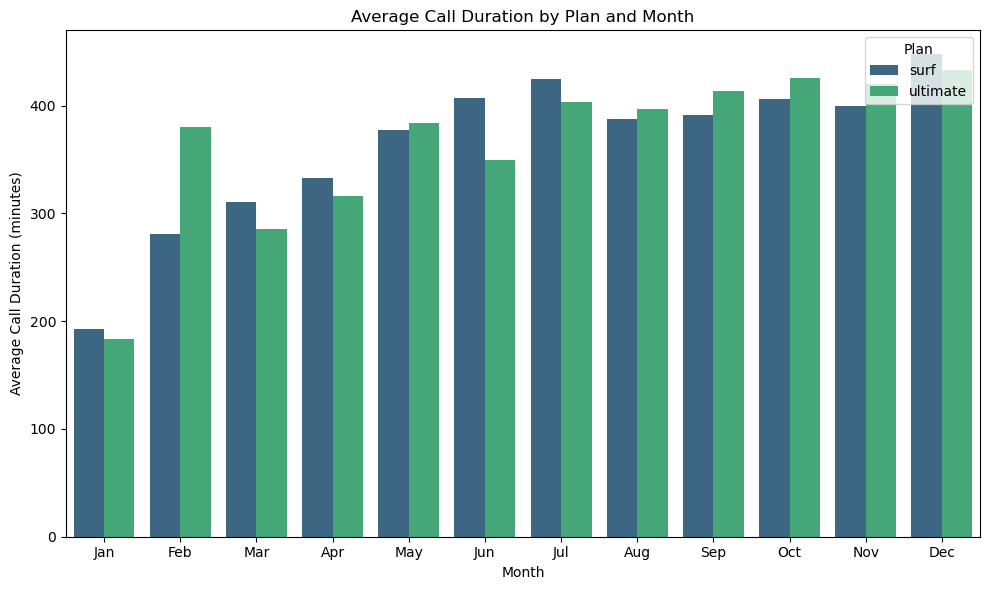

In [725]:
# Ajuste para meses no eixo X:
average_call_duration['month_abbr'] = average_call_duration['month'].apply(lambda x: calendar.month_abbr[x.month] if hasattr(x, 'month') else calendar.month_abbr[int(str(x)[-2:])])

# Definir ordem cronológica
month_order = list(calendar.month_abbr)[1:]  # Ignora o primeiro item vazio

# Plotando o gráfico com nomes abreviados dos meses
plt.figure(figsize=(10, 6))
sns.barplot(data=average_call_duration, 
            x='month_abbr', 
            y='average_call_duration', 
            hue='plan', 
            palette='viridis',
            order=month_order)

# Configurar o gráfico
plt.title('Average Call Duration by Plan and Month')
plt.xlabel('Month')
plt.ylabel('Average Call Duration (minutes)')
plt.xticks(rotation=0)
plt.legend(title='Plan', loc='upper right')

plt.tight_layout()
plt.show()


Compare o número de minutos que os usuários de cada plano necessitam a cada mês.  
Construa um histograma.

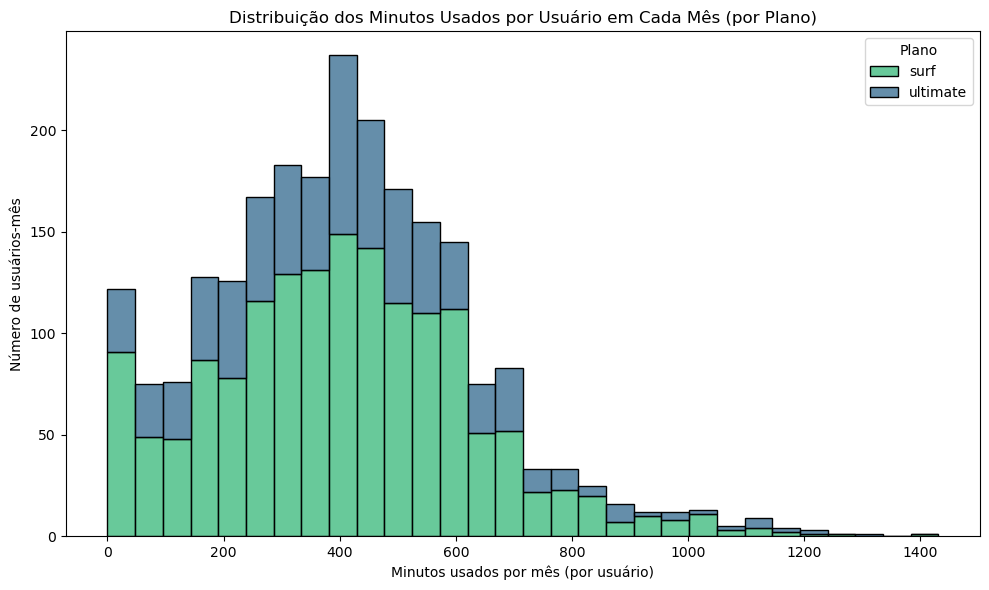

In [726]:
# Histograma:
plt.figure(figsize=(10, 6))
ax = sns.histplot(
    data=monthly_user_consumption,
    x='total_duration',
    hue='plan',
    bins=30,
    kde=False,
    palette='viridis',
    multiple='stack'
)

# Configurar o gráfico
handles, labels = ax.get_legend_handles_labels()
if handles:
    plt.legend(title='Plano', handles=handles, labels=labels)
else:
    plt.legend(title='Plano', labels=['surf', 'ultimate'])  # alternativa manual

plt.title('Distribuição dos Minutos Usados por Usuário em Cada Mês (por Plano)')
plt.xlabel('Minutos usados por mês (por usuário)')
plt.ylabel('Número de usuários-mês')
plt.tight_layout()
plt.show()

Calcule a média e a variância da duração das chamadas para refletir se os usuários de cada plano possuem comportamentos diferentes sobre as chamadas:

In [727]:
# Agrupar por plano e calcular média e variância:
stats_calls = monthly_user_consumption.groupby('plan')['total_duration'].agg(['mean', 'var', 'std']).reset_index()

# Renomear colunas para clareza:
stats_calls.columns = ['Plano', 'Média (min/mês)', 'Variância', 'Desvio Padrão']

# Mostrar a tabela formatada:
print(stats_calls)

      Plano  Média (min/mês)     Variância  Desvio Padrão
0      surf       404.762390  49135.104891     221.664397
1  ultimate       406.193083  51640.971402     227.246499


Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas:  

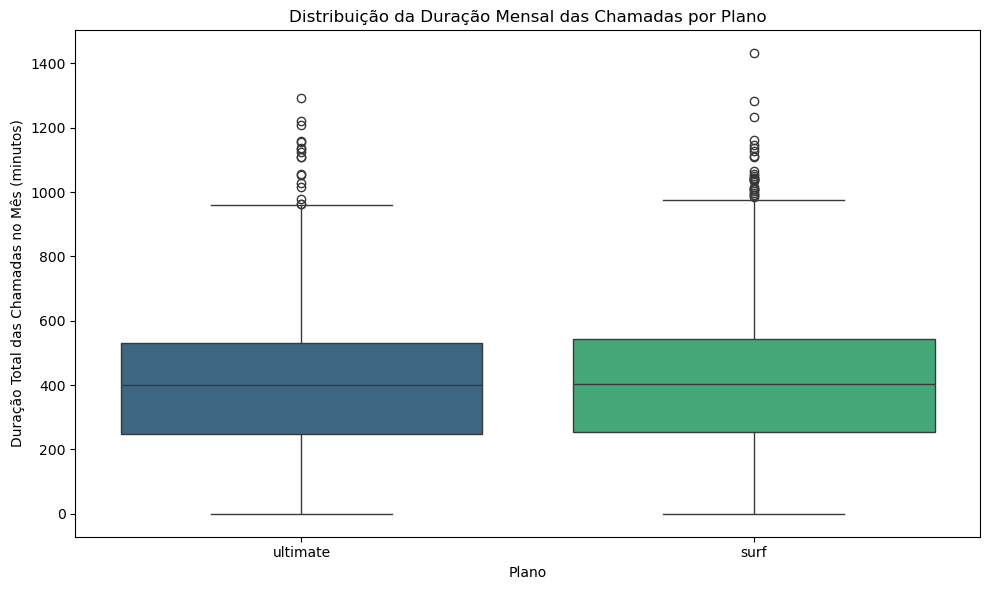

In [728]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=monthly_user_consumption,
    x='plan',
    y='total_duration',
    hue='plan',          # Adicionado
    palette='viridis',
    legend=False         # Para não repetir legenda desnecessária
)

plt.title('Distribuição da Duração Mensal das Chamadas por Plano')
plt.xlabel('Plano')
plt.ylabel('Duração Total das Chamadas no Mês (minutos)')
plt.tight_layout()
plt.show()

Formule conclusões sobre como os usuários se comportam em termos de chamadas. O comportamento é diferente dependendo do plano?

**Semelhanças entre planos**:  
Ambos os planos têm médias muito semelhantes para a duração das chamadas,  
em termos de uso médio de minutos, os planos são parecidos.  
  
**Diferenças entre planos**:  
O **Plano Ultimate** apresenta maior variabilidade no uso de minutos, com mais outliers e uma maior dispersão em torno da média,  
o que pode indicar um comportamento mais imprevisível, com alguns usuários consumindo muito mais minutos que outros.  
O **Plano Surf** tem um comportamento mais consistente, com menos usuários ultrapassando o limite de minutos.  
  
Essas observações podem ser úteis para entender o potencial de receita adicional, onde o **Plano Ultimate** tem mais espaço para cobrança extra devido ao uso variável,  
enquanto o **Plano Surf** pode ser mais estável em termos de consumo.

### Mensagens:

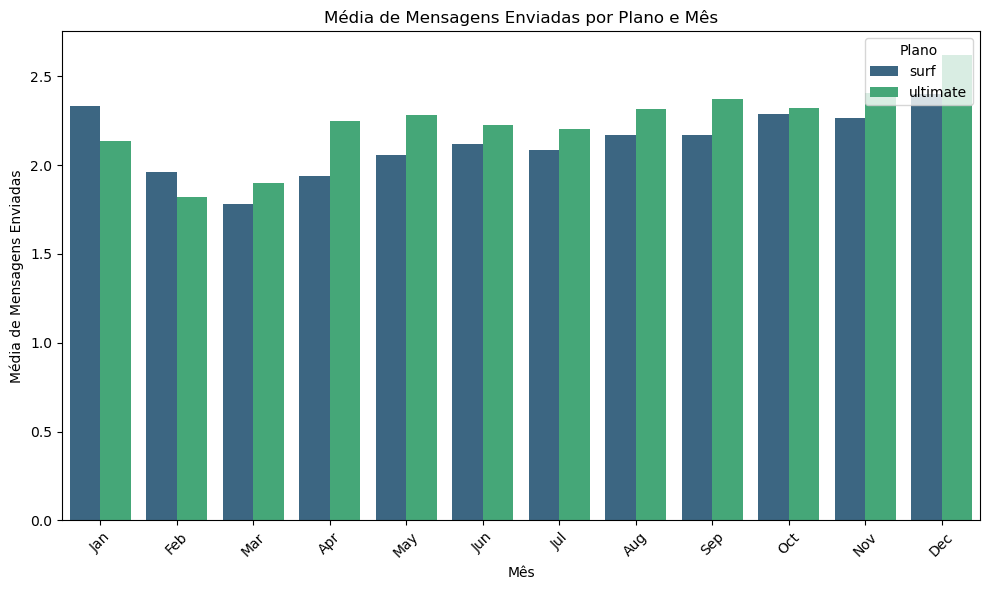

In [729]:
# Garantir que a coluna de data esteja no formato datetime
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'])

# Contar o número de mensagens enviadas por usuário a cada mês
monthly_user_messages = messages_df.groupby(['user_id', 'message_date']).size().reset_index(name='total_messages')

# Adicionar a coluna do plano, unindo com a tabela de usuários
monthly_user_messages = monthly_user_messages.merge(users_df[['user_id', 'plan']], on='user_id', how='left')

# Extrair o número do mês
monthly_user_messages['month'] = monthly_user_messages['message_date'].dt.month

# Agrupar por plano e mês e calcular a média de mensagens enviadas
average_messages_per_month = monthly_user_messages.groupby(['plan', 'month'])['total_messages'].mean().reset_index(name='average_messages')

# Converter o número do mês para o nome abreviado
average_messages_per_month['month'] = average_messages_per_month['month'].apply(lambda x: calendar.month_abbr[x])

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=average_messages_per_month, x='month', y='average_messages', hue='plan', palette='viridis')

# Configurar o gráfico
plt.title('Média de Mensagens Enviadas por Plano e Mês')
plt.xlabel('Mês')
plt.ylabel('Média de Mensagens Enviadas')
plt.xticks(rotation=45)
plt.legend(title='Plano', loc='upper right')

# Exibir o gráfico
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

O gráfico está ótimo!
</div>

Compare a quantidade de tráfego de internet consumido pelos usuários por plano:

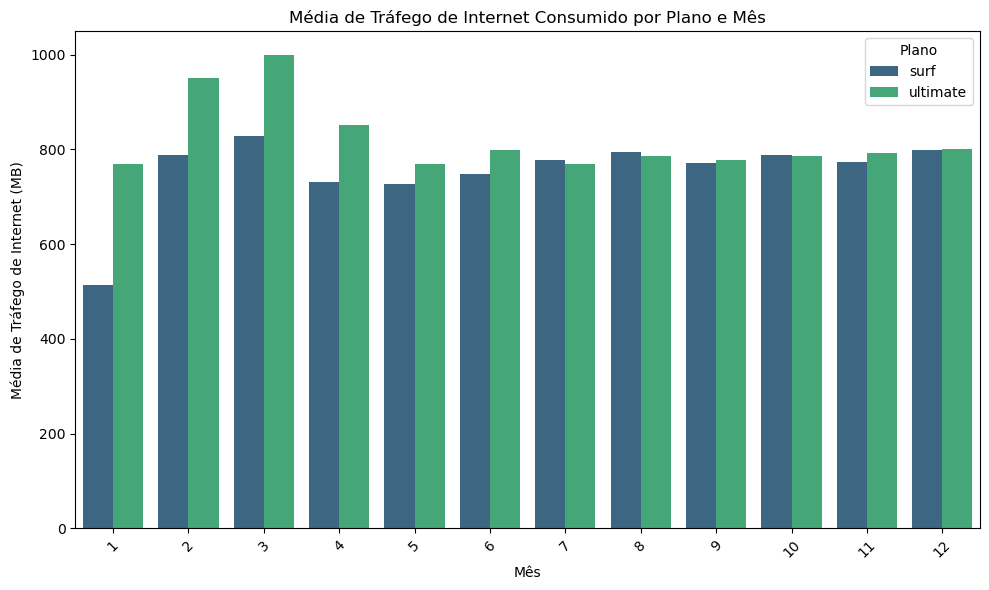

In [730]:
# Agrupar o consumo de dados por usuário e mês:
monthly_user_internet = internet_df.groupby(['user_id', 'session_date'])['mb_used'].sum().reset_index(name='total_data_usage')

# Adicionar a coluna do plano, unindo com a tabela de usuários:
monthly_user_internet = monthly_user_internet.merge(users_df[['user_id', 'plan']], on='user_id', how='left')

# Extrair o mês de cada data de sessão de internet:
monthly_user_internet['month'] = monthly_user_internet['session_date'].dt.month

# Agrupar por plano e mês e calcular a média de consumo de dados:
average_data_per_month = monthly_user_internet.groupby(['plan', 'month'])['total_data_usage'].mean().reset_index(name='average_data_usage')

# Plotting the bar chart:
plt.figure(figsize=(10, 6))
sns.barplot(data=average_data_per_month, x='month', y='average_data_usage', hue='plan', palette='viridis')

# Configurar o gráfico:
plt.title('Média de Tráfego de Internet Consumido por Plano e Mês')
plt.xlabel('Mês')
plt.ylabel('Média de Tráfego de Internet (MB)')
plt.xticks(rotation=45)
plt.legend(title='Plano', loc='upper right')

# Exibir o gráfico:
plt.tight_layout()
plt.show()

Visualize a distribuição das mensagens enviadas por plano:

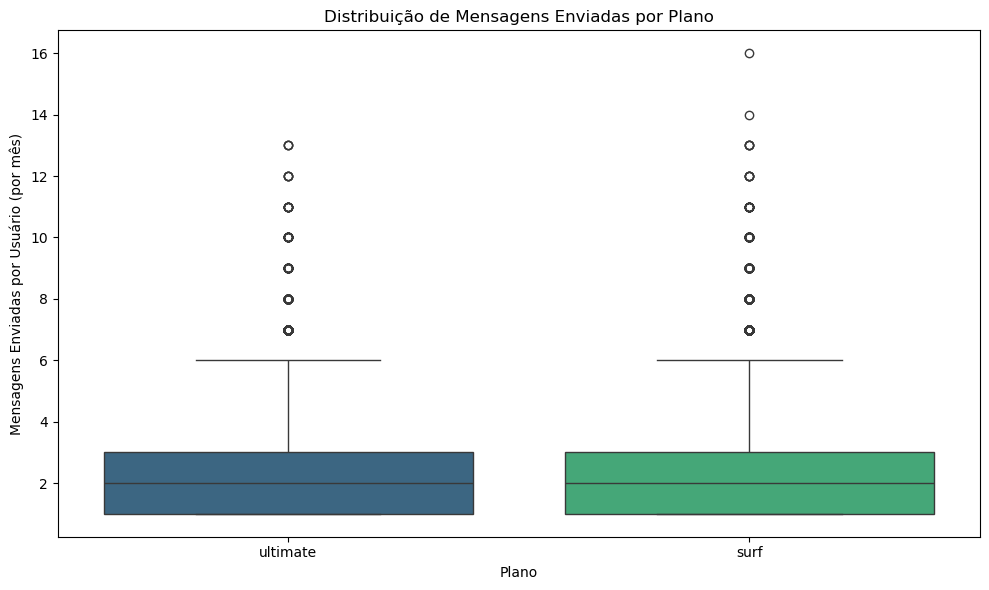

In [731]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=monthly_user_messages,
    x='plan',
    y='total_messages',
    hue='plan',
    palette='viridis',
    legend=False
)

plt.title('Distribuição de Mensagens Enviadas por Plano')
plt.xlabel('Plano')
plt.ylabel('Mensagens Enviadas por Usuário (por mês)')
plt.tight_layout()
plt.show()

### Internet:

Encontre os minutos, e volume de dados que os usuários de cada plano necessitam por mês:

In [732]:
# Taxa de conversão: 10 MB = 1 minuto de internet:
MB_PER_MINUTE = 10

# Agrupar o uso total de dados por usuário e mês:
monthly_user_internet = internet_df.groupby(['user_id', 'session_date'])['mb_used'].sum().reset_index(name='total_data_usage')

# Converter MB em minutos estimados:
monthly_user_internet['estimated_minutes'] = monthly_user_internet['total_data_usage'] / MB_PER_MINUTE

# Adicionar informação do plano de cada usuário:
monthly_user_internet = monthly_user_internet.merge(users_df[['user_id', 'plan']], on='user_id', how='left')

# Extrair o número do mês (para separar uso mensal):
monthly_user_internet['month'] = monthly_user_internet['session_date'].dt.month

# Calcular médias mensais por plano (minutos estimados e volume de dados):
monthly_avg_by_plan = monthly_user_internet.groupby('plan')[['estimated_minutes', 'total_data_usage']].mean().reset_index()

# Renomear colunas para melhor clareza:
monthly_avg_by_plan.columns = ['plan', 'average_internet_minutes', 'average_data_mb']

# Exibir resultados:
print('Consumo médio mensal de internet por plano:')
print(monthly_avg_by_plan)

Consumo médio mensal de internet por plano:
       plan  average_internet_minutes  average_data_mb
0      surf                 77.942903       779.429031
1  ultimate                 79.371054       793.710539


In [733]:
# Remover qualquer 'plan' existente para evitar conflitos no merge:
monthly_user_internet = monthly_user_internet.drop(columns=['plan'], errors='ignore')

# Fazer o merge correto com users_df para trazer o plano:
monthly_user_internet = monthly_user_internet.merge(users_df[['user_id', 'plan']], on='user_id', how='left')

# Verificar se a coluna 'plan' foi corretamente adicionada:
print("\nAmostra após o merge com 'users_df':\n")
print(monthly_user_internet[['user_id', 'total_data_usage', 'estimated_minutes', 'plan']].head())

# Calcular estatísticas descritivas por plano em MB:
stats_by_plan = monthly_user_internet.groupby('plan').agg({
    'estimated_minutes': ['mean', 'var', 'std'],
    'total_data_usage': ['mean', 'var', 'std']
}).reset_index()

# Ajustar nomes das colunas:
stats_by_plan.columns = ['plan',
                         'mean_minutes', 'var_minutes', 'std_minutes',
                         'mean_data_mb', 'var_data_mb', 'std_data_mb']

# Adicionar colunas em GB (1 GB = 1024 MB):
stats_by_plan['mean_data_gb'] = stats_by_plan['mean_data_mb'] / 1024
stats_by_plan['var_data_gb'] = stats_by_plan['var_data_mb'] / (1024 ** 2)  # variância escala com o quadrado
stats_by_plan['std_data_gb'] = stats_by_plan['std_data_mb'] / 1024

# Exibir resultados:
print()
print('Estatísticas descritivas do uso de internet por plano (MB e GB):')
print()
print(stats_by_plan)



Amostra após o merge com 'users_df':

   user_id  total_data_usage  estimated_minutes      plan
0     1000            270.99             27.099  ultimate
1     1000            880.22             88.022  ultimate
2     1000            660.40             66.040  ultimate
3     1000             89.86              8.986  ultimate
4     1000              0.00              0.000  ultimate

Estatísticas descritivas do uso de internet por plano (MB e GB):

       plan  mean_minutes  var_minutes  std_minutes  mean_data_mb  \
0      surf     77.942903  3770.396052    61.403551    779.429031   
1  ultimate     79.371054  3822.940582    61.829933    793.710539   

     var_data_mb  std_data_mb  mean_data_gb  var_data_gb  std_data_gb  
0  377039.605239   614.035508      0.761161     0.359573     0.599644  
1  382294.058186   618.299327      0.775108     0.364584     0.603808  


Por que variância é dividida por 1024²?  
- Variância tem unidade ao quadrado, então para converter de MB² para GB² divide por (1024²).
- Desvio padrão é raiz da variância, por isso divide por 1024 (mesmo fator da média).

Histograma de minutos estimados de uso de internet por plano:

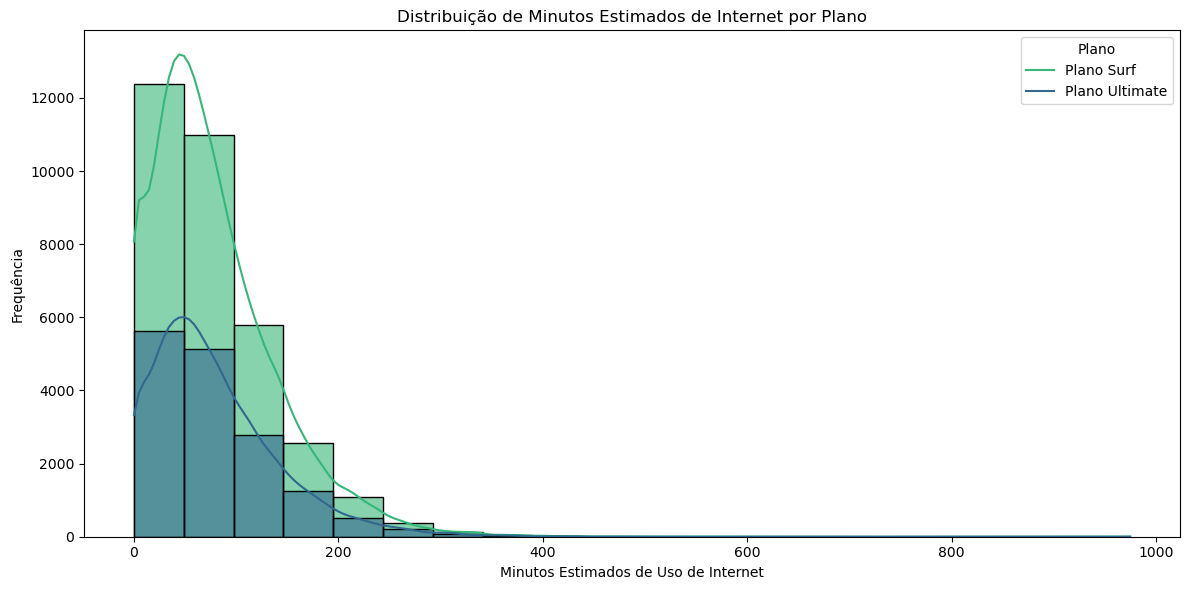

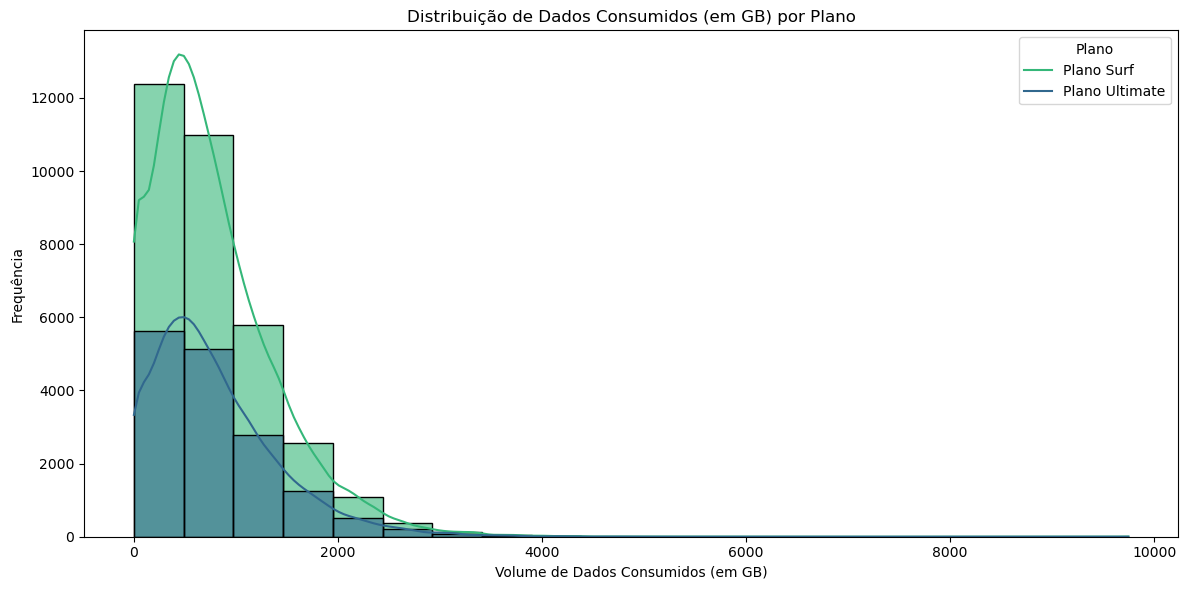

In [734]:
plt.figure(figsize=(12, 6))
sns.histplot(data=monthly_user_internet, x='estimated_minutes', hue='plan', kde=True, bins=20, palette='viridis', alpha=0.6)

# Título e configurações do gráfico:
plt.title('Distribuição de Minutos Estimados de Internet por Plano')
plt.xlabel('Minutos Estimados de Uso de Internet')
plt.ylabel('Frequência')

# Criar a legenda manualmente:
plt.legend(title='Plano', labels=['Plano Surf', 'Plano Ultimate'], loc='upper right')

# Exibir gráfico:
plt.tight_layout()
plt.show()

# Histograma de volume de dados consumidos (em GB) por plano:
plt.figure(figsize=(12, 6))
sns.histplot(data=monthly_user_internet, x='total_data_usage', hue='plan', kde=True, bins=20, palette='viridis', alpha=0.6)

# Título e configurações do gráfico:
plt.title('Distribuição de Dados Consumidos (em GB) por Plano')
plt.xlabel('Volume de Dados Consumidos (em GB)')
plt.ylabel('Frequência')

# Criar a legenda manualmente:
plt.legend(title='Plano', labels=['Plano Surf', 'Plano Ultimate'], loc='upper right')

# Exibir gráfico:
plt.tight_layout()
plt.show()

Formule conclusões sobre como os usuários tendem a consumir o tráfego da internet.  
O comportamento é diferente dependendo do plano?  
  
- Os usuários de ambos os planos têm um comportamento de uso de dados muito semelhante.  
  
- A média e o desvio padrão são quase iguais, o que indica ausência de diferença significativa no uso médio.  
  
- Pouquíssimos usuários extrapolam o limite do **Plano Surf**, o que pode indicar que o plano é mais que suficiente para o perfil médio do cliente Megaline em relação à internet.  
Já o **Plano Ultimate** oferece mais do que os usuários realmente consomem, o que pode não justificar o preço mais alto para quem usa pouco internet.

### Receita:  
Conforme as análises de comportamento dos usuários, descreva estatisticamente as receitas dos planos:

In [735]:
# Receita mensal por usuário:
def calculate_revenue(row):
    if row['plan'] == 'surf':
        monthly_fee = 20
        extra_mb_cost = 0.01
    else:  # Ultimate
        monthly_fee = 70
        extra_mb_cost = 0

    if row['total_data_usage'] > 15360:  # 15 GB = 15360 MB para Surf
        extra_cost = (row['total_data_usage'] - 15360) * extra_mb_cost
    else:
        extra_cost = 0

    return monthly_fee + extra_cost

# Calcular receita com base no uso:
monthly_user_internet['revenue'] = monthly_user_internet.apply(calculate_revenue, axis=1)
print(monthly_user_internet['revenue'])

0        70
1        70
2        70
3        70
4        70
         ..
49028    20
49029    20
49030    20
49031    20
49032    20
Name: revenue, Length: 49033, dtype: int64


In [736]:
# Estatísticas descritivas da receita por plano:
revenue_stats_by_plan = monthly_user_internet.groupby('plan')['revenue'].agg(['mean', 'var', 'std']).reset_index()

# Renomear colunas:
revenue_stats_by_plan.columns = ['plan', 'mean_revenue', 'var_revenue', 'std_revenue']

# Exibir tabela:
print('Estatísticas descritivas da receita mensal por plano:')
print()
print(revenue_stats_by_plan)

Estatísticas descritivas da receita mensal por plano:

       plan  mean_revenue  var_revenue  std_revenue
0      surf          20.0          0.0          0.0
1  ultimate          70.0          0.0          0.0


Histograma da receita por plano:

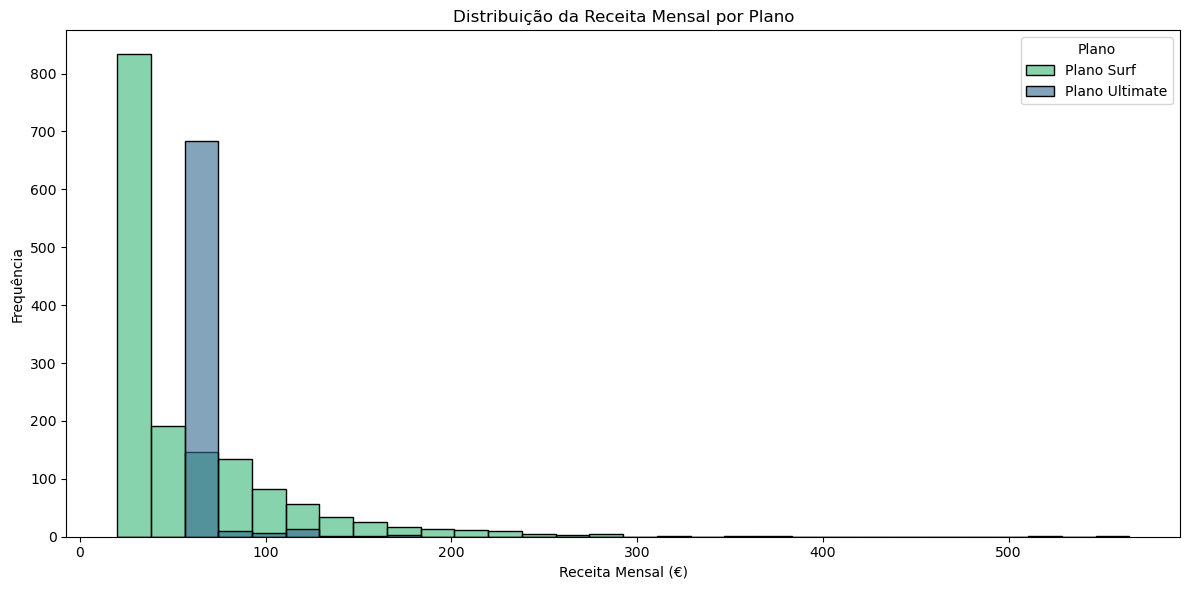

In [737]:
# Histograma da receita por plano (sem kde)
plt.figure(figsize=(12, 6))
sns.histplot(data=monthly_user_consumption, x='receita_total_per_client', hue='plan', bins=30, palette='viridis', alpha=0.6)
plt.title('Distribuição da Receita Mensal por Plano')
plt.xlabel('Receita Mensal (€)')
plt.ylabel('Frequência')
plt.legend(title='Plano', labels=['Plano Surf', 'Plano Ultimate'])
plt.tight_layout()
plt.show()

Formule conclusões sobre como a receita difere entre os planos:  
  
Com base na análise de uso e receita, observa-se que a **receita mensal por usuário é fixa em ambos os planos**:  
20€ no Plano Surf e 70€ no Plano Ultimate, sem variações entre clientes.  
  
Isso indica que nenhum usuário do **Plano Surf** excedeu a franquia de dados (15 GB), o que impede a geração de receita adicional.  
Já o **Plano Ultimate**, com internet ilimitada, também não permite receitas variáveis.  
Apesar disso, o **Plano Ultimate** gera 3,5 vezes mais receita por cliente.  
  
Considerando que o consumo médio de internet é semelhante nos dois planos, uma estratégia recomendada para a empresa seria estimular a migração de usuários do **Plano Surf** para o **Plano Ultimate**,  
especialmente entre aqueles com maior uso mensal, maximizando o faturamento sem necessidade de expandir a base de clientes.

### Teste hipóteses estatísticas:

- Teste a hipótese de que a receita média dos usuários dos planos Ultimate e Surf são diferentes.
- Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.

In [738]:
# Definir nível de significância:
alpha = 0.05

# Separar receitas por plano:
revenues_surf = monthly_user_internet[monthly_user_internet['plan'] == 'surf']['revenue'].tolist()
revenues_ultimate = monthly_user_internet[monthly_user_internet['plan'] == 'ultimate']['revenue'].tolist()

# Executar o teste de Mann-Whitney U:
stat, p_value = mannwhitneyu(revenues_surf, revenues_ultimate, alternative='two-sided')

# Exibir resultados:
print(f'Estatística do teste: {stat:.2f}')
print(f'Valor-p: {p_value:.5f}')

if p_value < alpha:
    print(f'\nResultado: Como o valor-p ({p_value:.5f}) < α ({alpha}), rejeitamos H₀.')
    print('Conclusão: Há evidências de que a receita média dos dois planos é diferente.')
else:
    print(f'\nResultado: Como o valor-p ({p_value:.5f}) ≥ α ({alpha}), não rejeitamos H₀.')
    print('Conclusão: Não há evidências suficientes de que a receita média dos dois planos seja diferente.')

Estatística do teste: 0.00
Valor-p: 0.00000

Resultado: Como o valor-p (0.00000) < α (0.05), rejeitamos H₀.
Conclusão: Há evidências de que a receita média dos dois planos é diferente.


- Teste a hipótese de que a receita média dos usuários da área de NY-NJ difere dos usuários das demais regiões.
- Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.

In [739]:
# Função atualizada para calcular receita por usuário
def calc_revenue_per_user(plan, messages, call_minutes, internet_gb, tipo_custo='total'):
    if plan == 'surf':
        fixed_cost = 20
        cost_messages = max((messages - 50), 0) * 0.03
        cost_calls = max((call_minutes - 500), 0) * 0.03
        cost_internet = max((math.ceil(internet_gb) - 15), 0) * 10
    elif plan == 'ultimate':
        fixed_cost = 70
        cost_messages = max((messages - 1000), 0) * 0.01
        cost_calls = max((call_minutes - 3000), 0) * 0.01
        cost_internet = max((math.ceil(internet_gb) - 30), 0) * 7

    total_cost = fixed_cost + cost_messages + cost_calls + cost_internet

    if tipo_custo.lower() == 'message':
        return cost_messages
    elif tipo_custo.lower() == 'calls':
        return cost_calls
    elif tipo_custo.lower() == 'internet':
        return cost_internet
    elif tipo_custo.lower() == 'additional':
        return total_cost - fixed_cost
    else:
        return total_cost

# Exemplo de DataFrame monthly_user_consumption
monthly_user_consumption = pd.DataFrame({
    'user_id': [1, 2, 3, 4, 5],
    'plan': ['surf', 'ultimate', 'surf', 'ultimate', 'surf'],
    'total_messages_sent': [120, 150, 200, 100, 300],
    'total_duration': [600, 2500, 450, 3100, 900],  # minutos
    'total_traffic_used_mb': [2000, 5000, 16000, 17000, 18000]  # MB
})

# Converter uso de dados de MB para GB
monthly_user_consumption['internet_gb'] = monthly_user_consumption['total_traffic_used_mb'] / 1024

# Calcular a receita por usuário
monthly_user_consumption['revenue'] = monthly_user_consumption.apply(
    lambda row: calc_revenue_per_user(
        row['plan'],
        row['total_messages_sent'],
        row['total_duration'],
        row['internet_gb']
    ),
    axis=1
)

# DataFrame de usuários com cidades
users_df = pd.DataFrame({
    'user_id': [1, 2, 3, 4, 5],
    'city': ['New York', 'New Jersey', 'Los Angeles', 'Chicago', 'Miami']
})

# Identificar região NY-NJ
users_df['ny_nj_region'] = users_df['city'].apply(
    lambda x: 'NY-NJ' if 'New York' in x or 'New Jersey' in x else 'Outros'
)

# Juntar informações de região ao DataFrame de consumo
monthly_user_consumption = monthly_user_consumption.merge(
    users_df[['user_id', 'ny_nj_region']],
    on='user_id',
    how='left'
)

# Separar receitas por região
ny_nj_revenue = monthly_user_consumption[monthly_user_consumption['ny_nj_region'] == 'NY-NJ']['revenue']
other_revenue = monthly_user_consumption[monthly_user_consumption['ny_nj_region'] == 'Outros']['revenue']

# Frequência de receitas em NY-NJ
print("\nFrequência de valores de receita em NY-NJ:")
print(ny_nj_revenue.value_counts().sort_index())

# Teste t de médias
t_stat, p_value = stats.ttest_ind(ny_nj_revenue, other_revenue)

# Verificar hipótese
alpha = 0.05
print(f"\nEstatística t: {t_stat}")
print(f"Valor p: {p_value}")

if p_value < alpha:
    print("Rejeitamos a hipótese nula: há diferença significativa na receita média entre NY-NJ e as outras regiões.")
else:
    print("Não rejeitamos a hipótese nula: não há diferença significativa entre as receitas médias.")


Frequência de valores de receita em NY-NJ:
revenue
25.1    1
70.0    1
Name: count, dtype: int64

Estatística t: -0.4742540675773146
Valor p: 0.6677007717111487
Não rejeitamos a hipótese nula: não há diferença significativa entre as receitas médias.


### Conclusão geral:

Liste suas conclusões importantes nesta seção final, certifique-se de que elas cobrem todas as decisões (suposições) importantes que você tomou e que levaram à maneira como você processou e analisou os dados.

A análise preliminar dos dados revela que o plano **Surf** é mais popular devido ao seu custo acessível de 20 USD, sendo escolhido pela maioria dos clientes.  
No entanto, o plano **Ultimate**, com um custo mais alto de 70 USD, pode ser mais vantajoso para clientes com maior necessidade de dados e minutos extras, pois oferece melhores condições de excedentes.  
A receita gerada por ambos os planos depende do consumo adicional de minutos, mensagens e dados, sendo que o plano **Surf** tende a gerar mais custos extras, enquanto o plano **Ultimate** tem uma estrutura de excedente mais econômica.  

A estratégia ideal deve focar em ajustar os planos às necessidades dos consumidores, com promoções direcionadas e **estratégias de upsell** para clientes do plano **Surf** que frequentemente ultrapassam os limites.   
Além disso, é importante segmentar os consumidores por perfil de consumo e demografia para otimizar a rentabilidade de ambos os planos.  
  
**Distribuição dos Planos:**  
  
- Maioria dos consumidores escolhe o plano **Surf**, com 20 USD/mês.  
- Menor aderência ao plano Ultimate, com 70 USD/mês.  
- O plano **Surf** é adequado para consumidores com consumo moderado.  
  
**Análise de Consumo de Chamadas:**  
- Duração das chamadas varia entre 4,22 e 14,48 minutos.  
- Menor dependência de chamadas, indicando possível adequação de planos mais baratos.  
  
**Uso de Mensagens e Dados:**  
- A maioria dos consumidores envia poucas mensagens, com uso dentro do limite do plano.  
- O consumo de dados é variado, com alguns usuários excedendo os limites do plano Surf.  
  
**Estratégias de Upselling e Promoções:**  
- Usuários do **Plano Surf** que frequentemente excedem os limites podem ser incentivados a migrar para o **Plano Ultimate**.  
- Oferecer benefícios exclusivos para adesões ao **Plano Ultimate** podem atrair consumidores com maior demanda.  

---

**Autor:** Daniel Amorim  
**Análise de Dados | Marketing e Publicidade**  
**Especialista em Branding**  
🔗 [Linkedin: /danieloamorim](https://www.linkedin.com/in/danieloamorim)